#  #  Titanic Data Analysis

 // TASK LIST


Task 1 : Perform Data Cleaning

Task 2 : Calculate summary statistics

Task 2 : Visualization using Histogram

In [1]:
# Import important libraries 

import pandas as pd 
import numpy as np
import seaborn as sns 
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Task 1 : Perform Data Cleaning
Clean a dataset by removing missing values
and outliers.

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
data[['Age']].describe().T # Age Column.

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [8]:
unique_values_of_cabin = data['Cabin'].unique()
unique_values_of_cabin

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
mean_of_age = data['Age'].mean()
mode_of_cabin = data['Cabin'].mode()
mode_of_embarked = data['Embarked'].mode()

not_null_df = data.copy()
not_null_df['Age'] = not_null_df['Age'].fillna(mean_of_age )
not_null_df['Cabin'] = not_null_df['Cabin'].fillna(mode_of_cabin[0])  
not_null_df['Embarked'] = not_null_df['Embarked'].fillna(mode_of_embarked[0])

In [10]:
not_null_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
excel_data = not_null_df.to_excel("cleaned_titanic_dataset.xlsx")

In [12]:
clean_data = not_null_df.copy()


# Task 2 : Calculate summary statistics
Calculate summary statistics (mean, median,
mode, standard deviation) for a dataset


In [13]:

columns = list(clean_data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

def describe_data(data, col):
    print ('\n\n', col)
    print ('_' * 40)
    print ('Mean:', np.mean(data))
    print ('STD:', np.std(data))      
    print ('Median', np.median(data))
    print ('mode', statistics.mode(data))
    print ('Min:', np.min(data))   
    print ('Max:', np.max(data))
for c in columns:
    describe_data(clean_data[c], c)



 PassengerId
________________________________________
Mean: 446.0
STD: 257.20938292890224
Median 446.0
mode 1
Min: 1
Max: 891


 Survived
________________________________________
Mean: 0.3838383838383838
STD: 0.48631931786710086
Median 0.0
mode 0
Min: 0
Max: 1


 Pclass
________________________________________
Mean: 2.308641975308642
STD: 0.8356019334795189
Median 3.0
mode 3
Min: 1
Max: 3


 Age
________________________________________
Mean: 29.699117647058763
STD: 12.994716872789033
Median 29.69911764705882
mode 29.69911764705882
Min: 0.42
Max: 80.0


 SibSp
________________________________________
Mean: 0.5230078563411896
STD: 1.1021244350892836
Median 0.0
mode 0
Min: 0
Max: 8


 Parch
________________________________________
Mean: 0.38159371492704824
STD: 0.8056047612452284
Median 0.0
mode 0
Min: 0
Max: 6


 Fare
________________________________________
Mean: 32.2042079685746
STD: 49.66553444477411
Median 14.4542
mode 8.05
Min: 0.0
Max: 512.3292



# Task 3 : Visualization using Histogram
Create a histogram or bar chart to visualize
the distribution of data in a dataset


In [14]:
# Set plot style
sns.set(style='ticks', color_codes=True)

Age and Survival
 

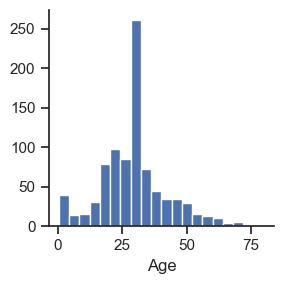

In [15]:

# Plot passenger age distribution
age_hist = sns.FacetGrid(clean_data)
age_hist.map(plt.hist, 'Age', bins=20)

We can see that there were about 40 kids aged 5 years or younger in the sample. The majority of passengers were between the ages of 20 - 35.

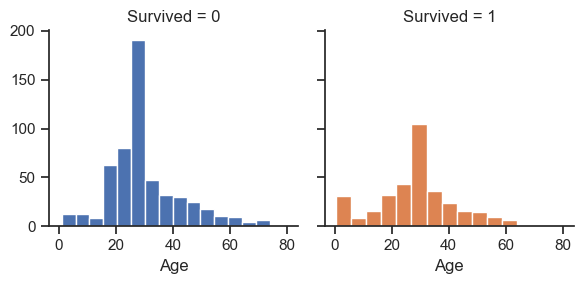

In [16]:
# Plot histogram of survival by age
age_hist = sns.FacetGrid(clean_data, col='Survived', hue='Survived')
age_hist.map(plt.hist, 'Age', bins=15)

The above shows the overall death and survival rates broken down by age. We can see that children under the age of 5 had a high survival rate. Additionally, we can see the vast majority of passengers that died were between 20-35 years old. Consdiering this is the expectation for the majority age range on board, this isn't much of a surprise. 

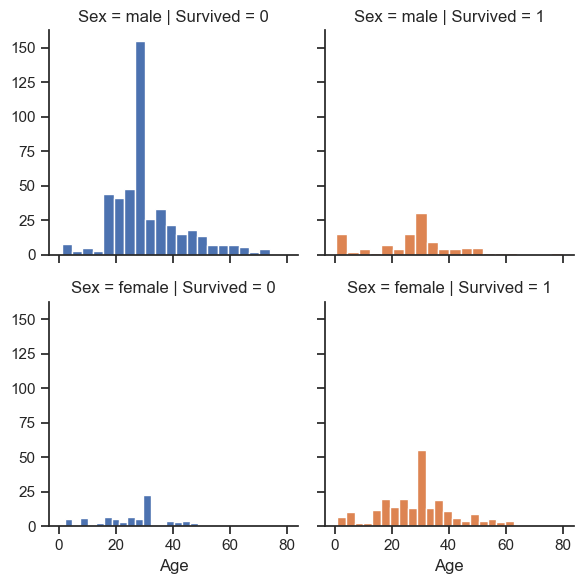

In [17]:
# Plot histogram by survival, sex, and age
age_sex_hist = sns.FacetGrid(clean_data, col='Survived', row='Sex', hue='Survived')
age_sex_hist.map(plt.hist, 'Age', bins=20)

This breakdown gives us an extremely interesting and informative view into the answer about survivability for women and children. If we look at the data for children 5 and under, we can see that sex didn't have much of an impact on survival. By in large, most of the children in this sample survived, including the males.

Another interesting insight we can see is just how many of the males on board died (aside from male children under 5). Men were more likely to have died than to have survived. When we make the same comparison for females, you can see that females in almost every age range were more likely to survive than to have died.

[Text(0, 0.5, '% Survivors'), Text(0.5, 0, 'Passenger Class')]

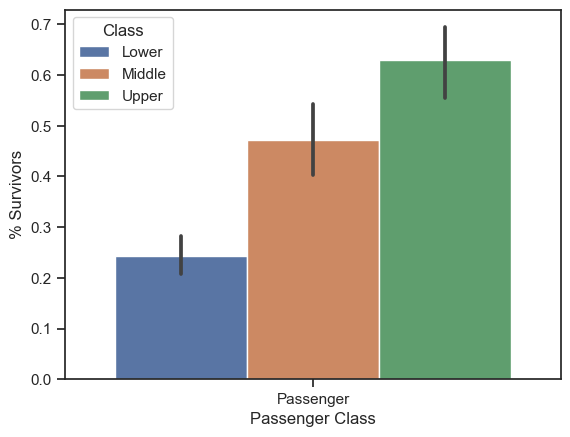

In [19]:
#Create Passenger column to plot total passengers
clean_data['Passenger'] = 'Passenger'
# Create Class column with string values for class
clean_data['Class'] = clean_data['Pclass'].map( {1: 'Upper', 2: 'Middle', 3: 'Lower'} )

# Create PointPlot for Passengers by Class
bp = sns.barplot(x='Passenger', y='Survived', hue='Class', data=clean_data, hue_order=['Lower', 'Middle', 'Upper'])
bp.set(ylabel='% Survivors', xlabel='Passenger Class')

This plot shows the average survival and confidence interval of passengers by class. Looking at the breakdown of average survival rates by class shows a stark correlation between class and rate of survival. Lower class passenger survival ranged somewhere between 20 - 30%, while upper class survival ranged somewhere between 55 - 70%, with middle class ranging somewhere between 35 - 55%.

[Text(0, 0.5, '% Survivors'), Text(0.5, 0, 'Passenger Sex by Class')]

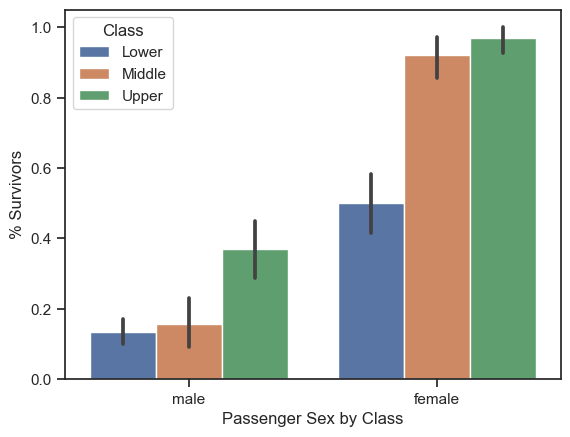

In [20]:
# Create PointPlot for Passengers by Class and Sex
bps = sns.barplot(x='Sex', y='Survived', hue='Class', data=clean_data, hue_order=['Lower', 'Middle', 'Upper'])
bps.set(ylabel='% Survivors', xlabel='Passenger Sex by Class')

We can see that middle class female passengers had almost the same rate of survival as upperclass females, but middle class men had about the same rate of survival as lower class men, which further illustrates the greater liklihood of women to have survived. Overall we can observe that upperclass passengers did indeed have a higher chance of survival than lower class passengers regardless of sex.

## Summary
Here is a quick summary of the answers to the questions posed as gleaned in this analysis:

* **What porportion of passengers in the sample survived?**
 * 38% of total passengers in the sample survived
* **Did  woman and children have a higher survival rate?**
 * The female survival rate in this sample was 55.3% higher than the survival rate for males. 
  * Women had a much higher rate of survival than men.
 * Children under the age of 5, regardless of sex, had a much higher rate of survival
* **Did upperclass passengers in the sample have an advantage that translated into a higher survival rate than lower class passengers?**
 * Class has a strong correlation with survival, with upperclass passengers having a much larger rate of survival than lower class passengers, regardless of sex and age.
 * Upperclass passengers were more likely to survive than lower class passengers.